In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install -c anaconda seaborn -y
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
#No data is missing as seen.

In [8]:
df = df.drop(df.columns[[0]], axis=1)
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df = df.drop(df.columns[[0]], axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df = df.drop(df.columns[[0]], axis=1)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
#dropping features which are not mainly responsible for the end output.

<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

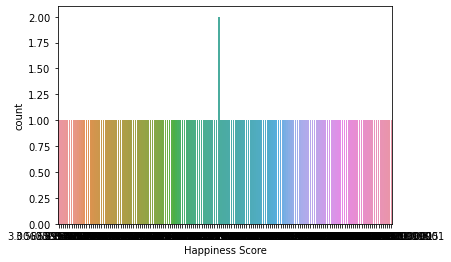

In [5]:
sns.countplot(df['Happiness Score'])

In [ ]:
#The target column is equally distributed, there is no class imbalance issue.

In [ ]:
#To check distribution plot

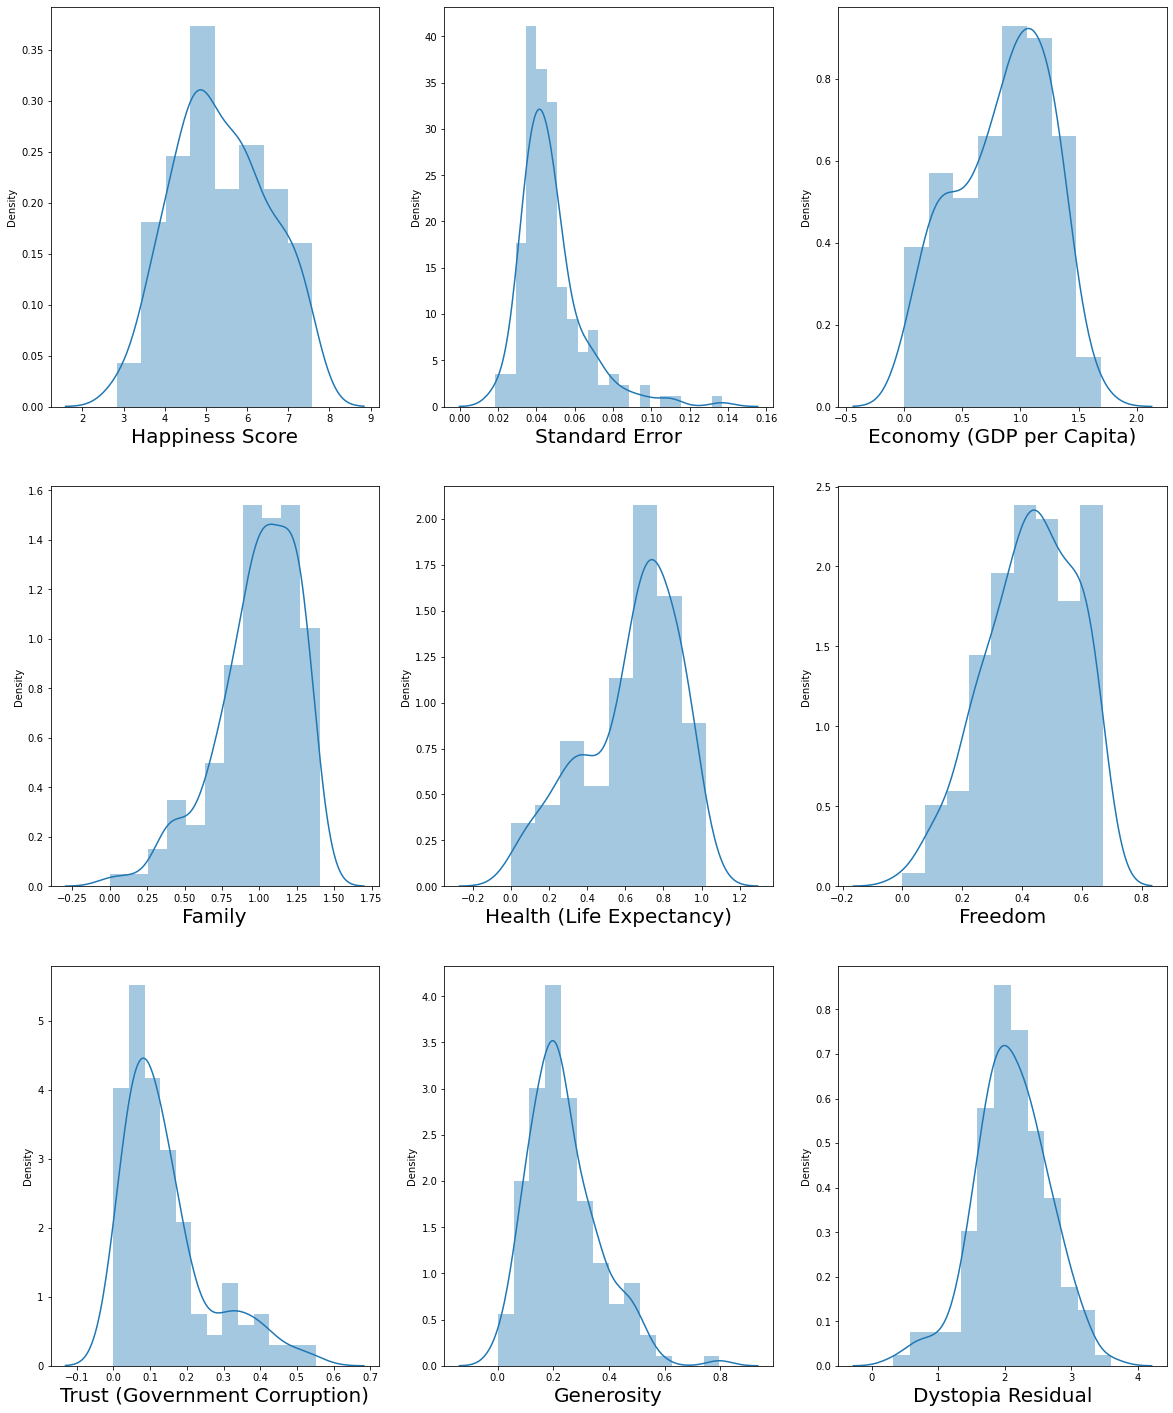

In [10]:
#Lets see how the data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=12: # asthere are 12 columns in the dataset.
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    
    plotnumber+=1
plt.show()

In [12]:
#dropping features which are not mainly responsible for the end output.

In [ ]:
#EDA

In [11]:
df.shape

(158, 9)

In [18]:
#we have 158 rows and 9 columns in the dataset after dropping the unwanted features. #EDA

In [12]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [20]:
#We have float type value in all independent variables
#and dependent variable.

In [21]:
## checking missing value

In [14]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
#As seen there are no miising values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [16]:
###Identifying outliers

<AxesSubplot:xlabel='Happiness Score'>

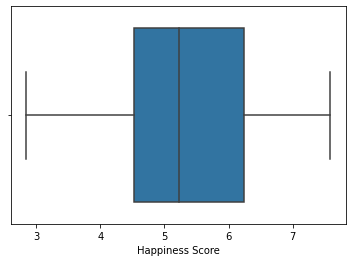

In [17]:
sns.boxplot(df["Happiness Score"])

In [ ]:
#We dont have outlers

<AxesSubplot:xlabel='Standard Error'>

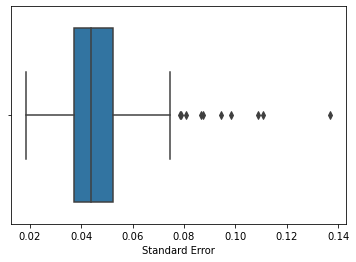

In [20]:
sns.boxplot(df["Standard Error"])

In [21]:
#We have outlers

<AxesSubplot:xlabel='Family'>

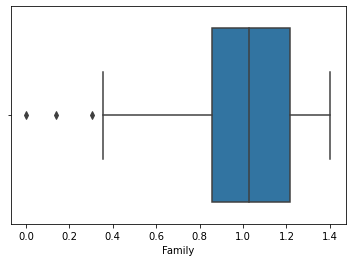

In [23]:
sns.boxplot(df["Family"])

In [ ]:
#We have outlers

<AxesSubplot:xlabel='Freedom'>

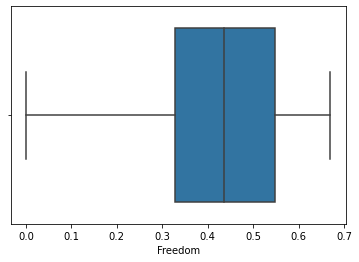

In [25]:
sns.boxplot(df["Freedom"])

In [ ]:
#We dont have outlers

<AxesSubplot:xlabel='Generosity'>

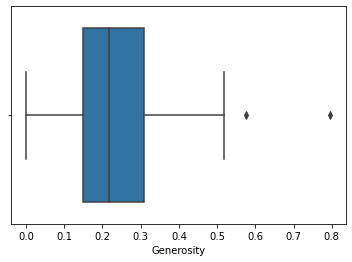

In [27]:
sns.boxplot(df["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual'>

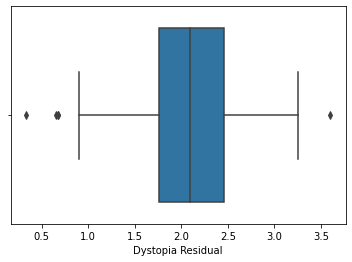

In [29]:
sns.boxplot(df["Dystopia Residual"])

In [ ]:
#We have outliers

In [ ]:
#We have outliers in Standard Error,Family,Generosity,Dystopia Residual.

In [ ]:
#Bi variate analysis

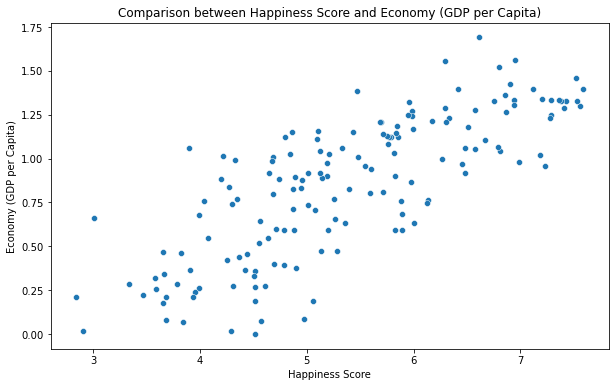

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Happiness Score and Economy (GDP per Capita)')
sns.scatterplot(df['Happiness Score'], df['Economy (GDP per Capita)']);

In [ ]:
#here we are plotting scatterplot, ie.,Comparison between Happiness Rank and Country

In [ ]:
#Multi-variate analysis

In [ ]:
#Heat map

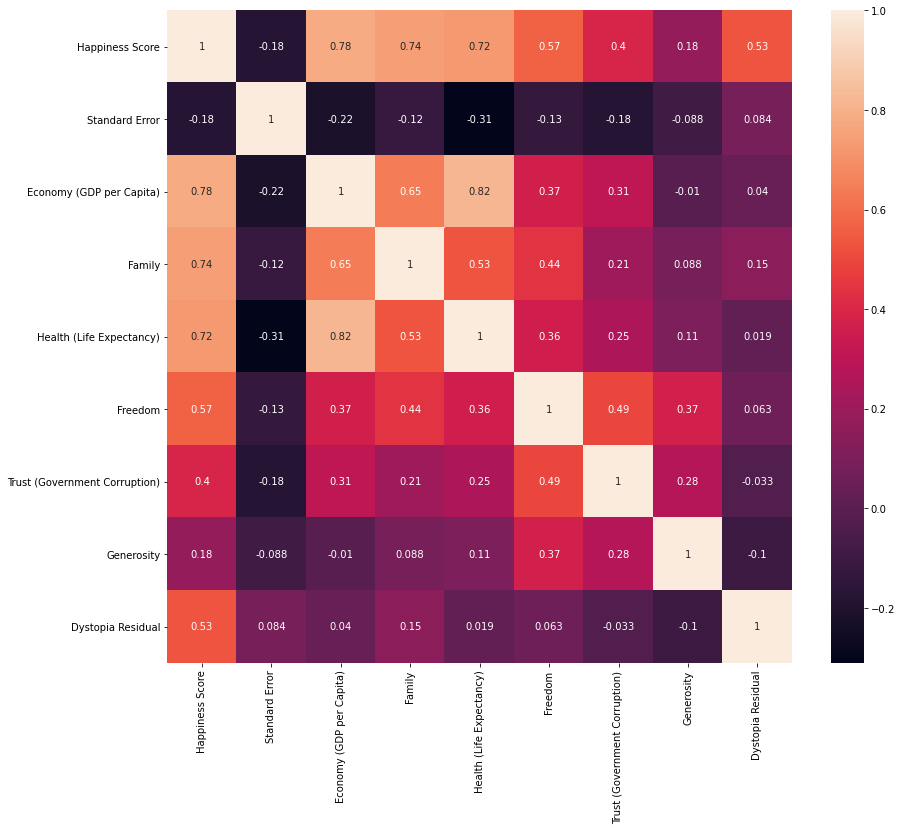

In [36]:
plt.figure(figsize=(14,12))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#we can see the corelation between all the features and is proportinality between them as Higher gdp and lower trust shows that the countries
#have a higher rank.

In [ ]:
#skewness removal

In [34]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
#Acceptable rangle for skewness value is +0.5 to -0.5.
#Outlside of this range is highly skew.
#Therefore Skewness for Economy , Family ,Health ,Freedom,Dystopia Residual are within the range.

In [37]:
y= df['Happiness Score']
x = df.drop('Happiness Score', axis=1)

In [38]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [39]:
#the target variable seen here given on the y variable.

In [40]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [41]:
#All the variables except Happiness Score.

In [46]:
Scaler = MinMaxScaler()

x = pd.DataFrame(Scaler.fit_transform(x), columns=x.columns)

In [ ]:
#Using MinMaxScaler for conversion.

In [47]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...
153,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


In [48]:
#All the values have been transformed and converted to values between zero and one.

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [53]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#we are using the linear regression model as the best one.

In [55]:
print(f"regression : R2:{model.score(x_test, y_test)}")

regression : R2:0.9999999275034048


In [ ]:
#R2 values is given above.